In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 8주차 과제
Cifar 100 데이터 셋을 분류

In [3]:
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Activation
from keras.datasets import cifar100
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

169001437/169001437 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
pd.DataFrame(y_train).nunique() # 클래스 개수 100개

0    100
dtype: int64

In [7]:
pd.DataFrame(y_train).value_counts() # 각 클래스마다 500개씩

0     500
63    500
73    500
72    500
71    500
     ... 
30    500
29    500
28    500
27    500
99    500
Length: 100, dtype: int64

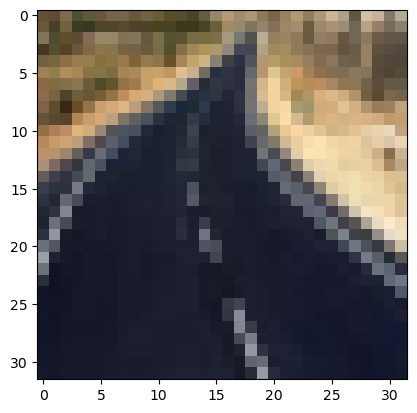

In [8]:
for i in [np.random.randint(0, 50000)]:
    plt.imshow(X_train[i]) # 이미지 예시 확인하기

In [9]:
X_train[0].shape

(32, 32, 3)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

datagen.fit(X_train)

In [36]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), kernel_initializer = 'he_uniform', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.3))


model.add(Conv2D(512, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_39 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 activation_39 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 dropout_58 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_40 (Bat  (None, 28, 28, 128)      512       
 chNormalization)                                    

In [37]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
hist = model.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100


2023-03-14 13:33:21.904008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_58/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 20s 44ms/step - loss: 5.1687 - accuracy: 0.0122 - val_loss: 4.5751 - val_accuracy: 0.0157
Epoch 2/100
391/391 [==============================] - 16s 41ms/step - loss: 4.5331 - accuracy: 0.0158 - val_loss: 4.5092 - val_accuracy: 0.0201
Epoch 3/100
391/391 [==============================] - 17s 42ms/step - loss: 4.4812 - accuracy: 0.0196 - val_loss: 4.4197 - val_accuracy: 0.0244
Epoch 4/100
391/391 [==============================] - 16s 42ms/step - loss: 4.4610 - accuracy: 0.0211 - val_loss: 4.4083 - val_accuracy: 0.0315
Epoch 5/100
391/391 [==============================] - 17s 43ms/step - loss: 4.4202 - accuracy: 0.0231 - val_loss: 4.3434 - val_accuracy: 0.0345
Epoch 6/100
391/391 [==============================] - 16s 41ms/step - loss: 4.3660 - accuracy: 0.0280 - val_loss: 4.2162 - val_accuracy: 0.0498
Epoch 7/100
391/391 [==============================] - 16s 41ms/step - loss: 4.3112 - accuracy: 0.0360 - val_loss: 4.1920 - val_accuracy: 0.05